## Вариант 15
### набор данных 5
### классификаторы:
### - линейный классификатор (персептрон);
### - логический классификатор (бинарное решающее дерево).

#### Шошин С.А. М19-ТС

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn as skl
from sklearn import preprocessing
from sklearn.preprocessing import label_binarize
from sklearn.metrics import accuracy_score, precision_recall_curve, average_precision_score, roc_curve, auc
from sklearn.linear_model import Perceptron
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.tree import DecisionTreeClassifier
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

#### 1.	Изучить набор данных. Создать описание набора данных на русском языке. Описать признаки, используемые в наборе данных (включить полученные описания в отчёт).

In [21]:
titanic = pd.read_csv('titanic3.csv', sep = ';', comment = '#', decimal=',')
titanic

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN
1308,3.0,0.0,"Zimmerman, Mr. Leo",male,29.0000,0.0,0.0,315082,7.8750,NaN,S,NaN,NaN,NaN


- pclass - класс билета
- survived - выжившие (0 = нет, 1 = да)
- name - имя
- sex - пол
- age - возраст
- sibsp - супруги / братья и сестры
- parch - родителей / детей
- ticket - номер билет
- fare - пассажирский тариф
- cabin - номер кабины
- embarked - порт погрузки (C = Cherbourg, Q = Queenstown, S = Southampton)
- boat - лодка
- body - количество человек
- home.dest - пути

In [22]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


#### 2.	Удалите дубликаты строк в наборе данных; приведите размер набора данных до и после данной операции;

In [23]:
print("До удаления дубликатов: ", titanic.shape)
titanic.drop_duplicates(keep='first',inplace = True)
print("После удаления: ", titanic.shape)

До удаления дубликатов:  (1310, 14)
После удаления:  (1310, 14)


#### 3.	Оцените сбалансированность данных по классам (постройте гистограмму). Используйте полученную информацию при выборе метрики оценки качества классификации (PR или ROC кривая)

<AxesSubplot:xlabel='survived', ylabel='count'>

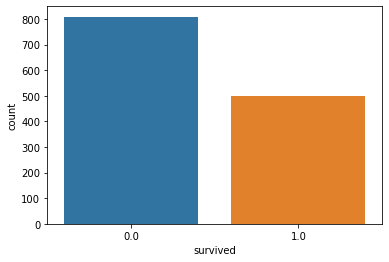

In [24]:
sns.countplot(data = titanic, x='survived')

#### 4.	Выполните масштабирование количественных признаков; Постройте диаграммы BoxPlot для признаков до и после масштабирования. Выберите способ масштабирования (например, нормализацию или стандартизацию);

In [26]:
#нужно убрать несколько столбцов 
titanic = titanic.drop(['name','ticket', 'body', 'cabin', 'home.dest', 'boat'], axis=1)
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,29.0000,0.0,0.0,211.3375,S
1,1.0,1.0,male,0.9167,1.0,2.0,151.5500,S
2,1.0,0.0,female,2.0000,1.0,2.0,151.5500,S
3,1.0,0.0,male,30.0000,1.0,2.0,151.5500,S
4,1.0,0.0,female,25.0000,1.0,2.0,151.5500,S


numerical:  ['age', 'sibsp', 'parch', 'fare']
categorial:  ['pclass', 'survived', 'sex', 'embarked']


<AxesSubplot:>

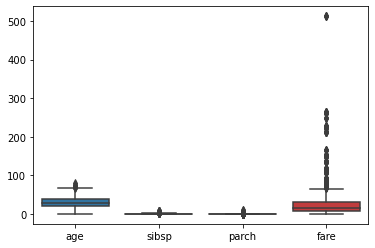

In [27]:
#выделим категориальные и числовые признаки
columns = titanic.columns

#survived и pclass должны быть категориальными
numerical = [i for i in columns if titanic[i].dtype.name != 'object'
                                     and i != 'pclass' and i != 'survived']
categorical = [i for i in columns if titanic[i].dtype.name == 'object' 
                                      or i == 'pclass' or i == 'survived']
print('numerical: ', numerical)
print('categorial: ', categorical)

sns.boxplot(data = titanic[numerical])

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,female,0.361169,0.000,0.000000,0.412503,S
1,1.0,1.0,male,0.009395,0.125,0.222222,0.295806,S
2,1.0,0.0,female,0.022964,0.125,0.222222,0.295806,S
3,1.0,0.0,male,0.373695,0.125,0.222222,0.295806,S
4,1.0,0.0,female,0.311064,0.125,0.222222,0.295806,S
...,...,...,...,...,...,...,...,...
1305,3.0,0.0,female,NaN,0.125,0.000000,0.028213,C
1306,3.0,0.0,male,0.329854,0.000,0.000000,0.014102,C
1307,3.0,0.0,male,0.336117,0.000,0.000000,0.014102,C
1308,3.0,0.0,male,0.361169,0.000,0.000000,0.015371,S


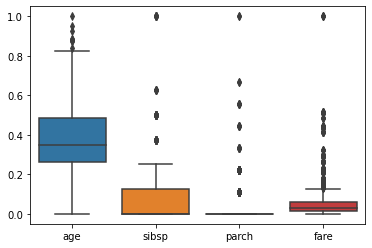

In [28]:
# масштабируем
scaler = preprocessing.MinMaxScaler()

titanic[numerical] = scaler.fit_transform(titanic[numerical].values.astype(float))
sns.boxplot(data=titanic[numerical])

titanic

#### 5.	Выполните замену категориальных признаков; выберите и обоснуйте способ замены;

In [30]:
#Меняем значения для бинарных признаков
titanic.at[titanic['sex'] == 'male', 'sex'] = 1
titanic.at[titanic['sex'] == 'female', 'sex'] = 0
titanic.head()

,pclass,survived,sex,age,sibsp,parch,fare,embarked
0,1.0,1.0,0,0.361169,0.000,0.000000,0.412503,S
1,1.0,1.0,1,0.009395,0.125,0.222222,0.295806,S
2,1.0,0.0,0,0.022964,0.125,0.222222,0.295806,S
3,1.0,0.0,1,0.373695,0.125,0.222222,0.295806,S
4,1.0,0.0,0,0.311064,0.125,0.222222,0.295806,S


In [31]:
#для небинарных
df_nonbinary = pd.get_dummies(titanic[nonbinary])
#удалим старыые колонки
titanic.drop(nonbinary, axis=1, inplace=True)
#добавим новые
titanic = pd.concat([titanic, df_nonbinary], axis=1)

In [32]:
titanic.head()

,age,sibsp,parch,fare,pclass,survived,sex_0,sex_1,embarked_C,embarked_Q,embarked_S
0,0.361169,0.000,0.000000,0.412503,1.0,1.0,1,0,0,0,1
1,0.009395,0.125,0.222222,0.295806,1.0,1.0,0,1,0,0,1
2,0.022964,0.125,0.222222,0.295806,1.0,0.0,1,0,0,0,1
3,0.373695,0.125,0.222222,0.295806,1.0,0.0,0,1,0,0,1
4,0.311064,0.125,0.222222,0.295806,1.0,0.0,1,0,0,0,1


#### 6.	Оцените корреляцию между признаков и удалите те признаки, которые коррелируют с наибольшим числом других (удалять признаки нужно только для линейных методов классификации);

<AxesSubplot:>

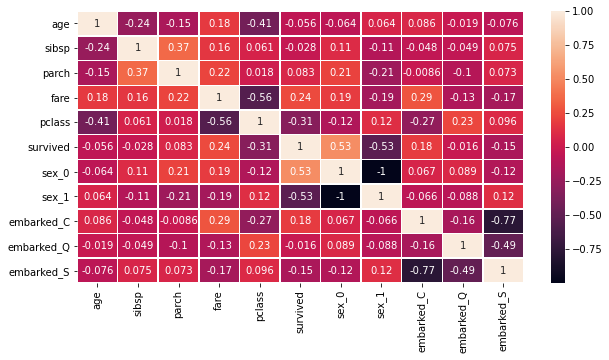

In [33]:
plt.figure(figsize=(10,5))
sns.heatmap(titanic.corr(), annot = True, linewidths=.5)

#### 7.	Заполните пропущенные значения в данных

In [34]:
titanic.count()

age           1046
sibsp         1309
parch         1309
fare          1308
pclass        1309
survived      1309
sex_0         1310
sex_1         1310
embarked_C    1310
embarked_Q    1310
embarked_S    1310
dtype: int64

In [35]:
titanic = titanic.fillna(titanic.median(axis=0), axis=0)
titanic.count()

age           1310
sibsp         1310
parch         1310
fare          1310
pclass        1310
survived      1310
sex_0         1310
sex_1         1310
embarked_C    1310
embarked_Q    1310
embarked_S    1310
dtype: int64

#### 8.	Решите поставленную задачу классификации в соответствии с заданием. При подборе параметров классификатора используйте метод GridSearchCV и перекрёстную проверку (изучите возможные для изменения параметры классификации)

1. Линейный классификатор (персептрон)

In [36]:
X, y = titanic.drop(('survived'), axis=1), titanic['survived']
feature_names = X.columns
print(feature_names)

Index(['age', 'sibsp', 'parch', 'fare', 'pclass', 'sex_0', 'sex_1',
       'embarked_C', 'embarked_Q', 'embarked_S'],
      dtype='object')


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape

In [40]:
ppn = Perceptron()

search = GridSearchCV(estimator=ppn, param_grid={
    'alpha': np.linspace(0, 1, 20)[1:],
    'max_iter': [x for x in range(1, 12)],
}, n_jobs=-1)
search.fit(X_train, y_train)
alpha = search.best_estimator_.alpha
max_iter = search.best_estimator_.max_iter
best = search.best_score_
print('best:', best, 'alpha:', alpha, 'max_iter:', max_iter)

ppn = Perceptron(alpha=alpha, max_iter=max_iter)
ppn.fit(X_train, y_train)
ppn_predict = ppn.predict(X_test)
print('Accuracy ppn: %.5f' % accuracy_score(y_test, ppn_predict))

best: 0.7623129009265859 alpha: 0.05263157894736842 max_iter: 2
Accuracy ppn: 0.77863


2. Логический классификатор (бинарное решающее дерево)

In [42]:
tree = DecisionTreeClassifier()
X, y = titanic.drop(('survived'), axis=1), titanic['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 11)
params = {'max_depth': list(range(1, 12))}

In [43]:
tree_grid = GridSearchCV(tree, params)
tree_grid.fit (X_train, y_train)

best_features = tree_grid.best_estimator_.max_features
best_depth = tree_grid.best_estimator_.max_depth
best_score = tree_grid.best_score_
print('лучший тренировочный результат:', best_score, 
      '\t глубина:', best_depth)

tree = DecisionTreeClassifier(max_depth=best_depth, max_features=best_features)
tree.fit(X_train, y_train)
best_score  = np.mean(y_test == tree.predict(X_test))
print('лучший результат: ', best_score)

лучший тренировочный результат: 0.7982359230220956 	 глубина: 8
лучший результат:  0.7888040712468194
